# DL TensorFlow Regression with UCI Auto MPG data set

In [9]:
"""
https://www.youtube.com/watch?v=rgQxVdOr9b8
https://www.youtube.com/watch?v=zNalsMIB3NE
https://www.youtube.com/watch?v=H1fhVBc-bcM
"""

'\nhttps://www.youtube.com/watch?v=rgQxVdOr9b8\nhttps://www.youtube.com/watch?v=zNalsMIB3NE\nhttps://www.youtube.com/watch?v=H1fhVBc-bcM\n'

In [10]:
"""
Regression with Auto-MPG data -- UCI dataset -- 398 data rows
https://archive.ics.uci.edu/ml/datasets/auto+mpg
The dataset is mentioned to have missing values
Original 398 rows; 6 rows with missing values
"""

'\nRegression with Auto-MPG data -- UCI dataset -- 398 data rows\nhttps://archive.ics.uci.edu/ml/datasets/auto+mpg\nThe dataset is mentioned to have missing values\nOriginal 398 rows; 6 rows with missing values\n'

In [11]:
def read_file_auto(filename):
    line_count = 0
    file_read = open(filename,"r")
    data_array = []
    for line in iter(file_read):
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        if "?" in line_split: # ignore lines with missing values
            line_count += 1
            print("Bad line number:",line_count)
            continue  
        elif "mpg" in line_split: # ignore header
            line_count += 1
            continue
        else:
            line_count += 1
            data_array.append(line_split)
    file_read.close()
    return data_array

In [12]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [13]:
auto_data = read_file_auto("auto-mpg.csv")
print(len(auto_data))

Bad line number: 34
Bad line number: 128
Bad line number: 332
Bad line number: 338
Bad line number: 356
Bad line number: 376
392


In [14]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
import keras.optimizers

In [15]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
import sklearn.metrics as metrics

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
"""
0...1.........2............3..........4......5............6....7......8
mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
"""

'\n0...1.........2............3..........4......5............6....7......8\nmpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name\n'

In [18]:
# Convert auto MPG data to NumPy array
dataset = np.array(auto_data)
X2 = dataset[:,1:7]
Y2 = dataset[:,0]

In [19]:
# Change string values to float numbers
X = X2.astype(np.float)

In [20]:
# Change target values to integers
Y = Y2.astype(np.float)

In [21]:
print(X[0:5])
print(Y[0:5])

[[   8.   307.   130.  3504.    12.    70. ]
 [   8.   350.   165.  3693.    11.5   70. ]
 [   8.   318.   150.  3436.    11.    70. ]
 [   8.   304.   150.  3433.    12.    70. ]
 [   8.   302.   140.  3449.    10.5   70. ]]
[18. 15. 18. 16. 17.]


In [22]:
# Use standard Machine Learning regression algorithms

In [23]:
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [24]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X,Y)
    y_predict = regressor.predict(X)
    regression_model_mse = mean_squared_error(y_predict,Y)
    print(regression_model," ",math.sqrt(regression_model_mse))

Linear_Regression   3.4044340177796397
Ridge   3.404434123988706
Lasso   3.4094022476460153
LassoLars   4.200454023280323
BayesianRidge   3.4061621809537463


In [25]:
# Best model is Linear_Regression with MSE 3.404

In [26]:
inputs = 6 # Number of X variables

In [28]:
model = Sequential()
model.add(Dense(1, input_shape=(6,)))
model.add(Activation('linear'))
# model.add(Dense(1,activation='linear', kernel_initializer='normal'))
# Compile model
sgd = keras.optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss='mse',optimizer=sgd,metrics=['mse'])
model.fit(X,Y,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 1ms/step - loss: 3002701.2321 - mse: 3002701.2321
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 2260522.5179 - mse: 2260522.5179
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1611762.8571 - mse: 1611762.8571
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1096673.9241 - mse: 1096673.9241
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 700104.8973 - mse: 700104.8973
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 366016.2232 - mse: 366016.2232
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 142405.5179 - mse: 142405.5179
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 28255.4265 - mse: 28255.4265
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 4765.2378 - mse: 4765.2378
Epoch 10/1000
13/13 [==============================] 

In [29]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_shape=(6,),activation='relu'))
    model.add(Dense(1,activation='linear', kernel_initializer='normal'))
    # Compile model
    sgd = keras.optimizers.SGD(lr=0.01, clipvalue=0.5)
    model.compile(loss='mse',optimizer=sgd,metrics=['mse'])
    # model.compile(loss='mse',optimizer='adam',metrics=['mse'])
    return model

In [30]:
"""
https://keras.io/scikit-learn-api/
https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasRegressor
"""    

'\nhttps://keras.io/scikit-learn-api/\nhttps://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasRegressor\n'

In [31]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=1000,verbose=0)
H = estimator.fit(X,Y)

In [32]:
y_predict = estimator.predict(X)
regression_model_mse = mean_squared_error(y_predict,Y)
print("Baseline ",math.sqrt(regression_model_mse))

Baseline  24.529026681616628


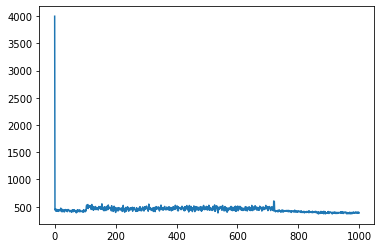

In [33]:
plt.plot(H.history['loss'])

In [34]:
"""
https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasRegressor
score: Mean accuracy of predictions on x wrt y
"""
estimator.score(X,Y)

-601.6731567382812

In [35]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=inputs, kernel_initializer='normal', activation='linear'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [36]:
seed = 7
np.random.seed(seed)
# evaluate model
estimator = KerasRegressor(build_fn=wider_model, epochs=1000, batch_size=5, verbose=0)
H = estimator.fit(X,Y)

In [37]:
y_predict = estimator.predict(X)
regression_model_mse = mean_squared_error(y_predict,Y)
print("Wider ",math.sqrt(regression_model_mse))

Wider  3.4655558681365637


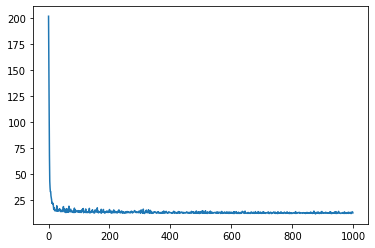

In [ ]:
plt.plot(H.history['loss'])

In [38]:
"""
https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasRegressor
score: Mean accuracy of predictions on x wrt y
"""
estimator.score(X,Y)

-12.010075569152832

In [39]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=inputs, kernel_initializer='normal', activation='linear'))
    model.add(Dense(6, kernel_initializer='normal', activation='linear'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [40]:
seed = 7
np.random.seed(seed)
# evaluate model
estimator = KerasRegressor(build_fn=larger_model, epochs=1000, batch_size=5, verbose=0)
H = estimator.fit(X,Y)

In [41]:
y_predict = estimator.predict(X)
regression_model_mse = mean_squared_error(y_predict,Y)
print("Larger ",math.sqrt(regression_model_mse))

Larger  3.4717491656652757


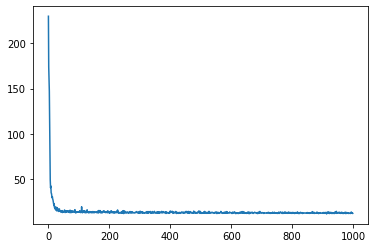

In [42]:
plt.plot(H.history['loss'])

In [43]:
"""
https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasRegressor
score: Mean accuracy of predictions on x wrt y
"""
estimator.score(X,Y)

-12.05303955078125

In [44]:
def wider_larger_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=inputs, kernel_initializer='normal', activation='linear'))
    model.add(Dense(13, kernel_initializer='normal', activation='linear'))
    model.add(Dense(6, kernel_initializer='normal', activation='linear'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [45]:
seed = 7
np.random.seed(seed)
# evaluate model
estimator = KerasRegressor(build_fn=wider_larger_model, epochs=1000, batch_size=5, verbose=0)
H = estimator.fit(X,Y)

In [46]:
y_predict = estimator.predict(X)
regression_model_mse = mean_squared_error(y_predict,Y)
print("Wider and Larger ",math.sqrt(regression_model_mse))

Wider and Larger  3.6853677218422836


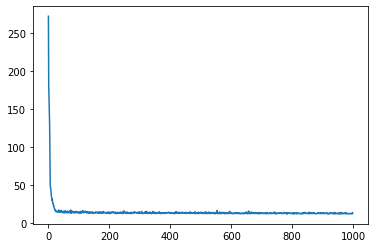

In [47]:
plt.plot(H.history['loss'])

In [48]:
"""
https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasRegressor
score: Mean accuracy of predictions on x wrt y
"""
estimator.score(X,Y)

-13.581933975219727